In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time 
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome

# Install Webdriver
service = Service(ChromeDriverManager().install())

# Create Driver Instance
driver = webdriver.Chrome(service=service)

# Get Web Page
driver.get('https://www.daraz.com.bd/catalog/?_keyori=ss&from=input&q=watch&spm=a2a0e.searchlist.search.go.1d2550d0JdHIlC&style=list')
soup=BeautifulSoup(driver.page_source,'lxml')
time.sleep(1)
driver.quit()

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="a2a0e" name="data-spm"/>
<meta content="notranslate" name="google"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width" name="viewport"/>
<link href="//g.alicdn.com/daraz-fe/buyer-im/99.99.99/index.css" rel="stylesheet"/><link href="//laz-g-cdn.alicdn.com" rel="dns-prefetch"/>
<link href="//laz-img-cdn.alicdn.com" rel="dns-prefetch"/>
<title>watch - Buy watch at Best Price in Bangladesh | www.daraz.com.bd</title>
<meta content="watch Bangladesh - Shop for best watch online at www.daraz.com.bd" name="description"/>
<meta content="25ZiIC89hBvAEL0Sgu7Ffw07GXU_d4CXtFvWyK3wMjo" name="google-site-verification"/>
<meta content="index, follow" name="robots"/>
<meta content='[{"filter":"exp-tracking=suggest-official-store","logkey":"/lzdse.result.os_impr","props":["href"],"tag":"a"},{"filter":"exp-tracking=sky-line-banner","logkey":"/lzdse.result.sky_impr","props":["href"],"tag":"a"},{"logkey":"
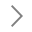

In [2]:
soup

In [3]:
# Find all <a> elements with id="id-a-link"
links = soup.find_all("a", id="id-a-link")
links

[<a age="0" class="product-card--IFIZj" href="//www.daraz.com.bd/products/2022-30m-i249576971-s1663800191.html?search=1" id="id-a-link"><div class="image-wrapper--t38gX" id="id-img"><img age="0" alt="Digital Watch Waterproof 30M Fashion Women's Watch for Men's Sports Waterproof Simple Silicone Electronic Watch for Women" class="image--Smuib" id="id-img" loading="lazy" src="https://static-01.daraz.com.bd/p/6b70980f8bfc09f2bff88bfab037117a.jpg_300x0q75.webp"/><div class="top-tags--IS_Cn"><i class="ic-dynamic-badge ic-dynamic-badge-undefined ic-dynamic-group-6" style='background-image: url("//gcp-img.slatic.net/lazada/id0072761-104-48.png"); width: 52px; height: 24px;'></i></div></div><div class="description--qV1sO"><div class="left--jVfwm"><div class="title-wrapper--UKxQD" id="id-title"><i class="ic-dynamic-badge ic-dynamic-badge-undefined ic-dynamic-group-3" style='background-image: url("https://img.alicdn.com/imgextra/i3/O1CN01UxU7pw1oEu5qZM9Yq_!!6000000005194-2-tps-82-32.png"); width:

In [4]:
link='https:'+links[0].get('href')
link

'https://www.daraz.com.bd/products/2022-30m-i249576971-s1663800191.html?search=1'

In [5]:
# Now you can work with the list of links found
for link in links:
    print('https:'+link.get('href'))  # Print the href attribute of each link

https://www.daraz.com.bd/products/2022-30m-i249576971-s1663800191.html?search=1
https://www.daraz.com.bd/products/led-i326153870-s1572745304.html?search=1
https://www.daraz.com.bd/products/new-years-discount-lanz-mens-luminous-dual-calendar-quartz-watch-with-pointed-glass-i319326071-s1465134623.html?search=1
https://www.daraz.com.bd/products/elegant-luxury-full-diamond-quartz-watch-ladies-korean-fashion-rhinestone-wristwatch-bracelet-set-i311044831-s1478801054.html?search=1
https://www.daraz.com.bd/products/ole_vs-men-leather-analoge-quartz-fashion-watch-for-men-brown-i272443734-s1519796722.html?search=1
https://www.daraz.com.bd/products/ole_vs-rep_lica-i302091697-s1440445888.html?search=1
https://www.daraz.com.bd/products/poedagar-615-i324454478-s1552859706.html?search=1
https://www.daraz.com.bd/products/trsoye-brand-new-luxury-fashion-leather-belt-watche-wrist-watche-for-men-i324522621-s1553189644.html?search=1
https://www.daraz.com.bd/products/olev_vs-luxury-top-quality-luxury-leath

In [6]:
soup.find("div",attrs={"id":"id-title"}).text.strip() #title

"Digital Watch Waterproof 30M Fashion Women's Watch for Men's Sports Waterproof Simple Silicone Electronic Watch for Women"

In [7]:
soup.find("span",attrs={"class":"currency--GVKjl"}).text.strip() #current price

'100'

In [8]:
soup.find("del",attrs={"class":"currency--GVKjl"}).text.strip() #original price

'৳ 199'

In [9]:
#<div data-spm-anchor-id="a2a0e.searchlist.sku.i41.79d07721ksE8C4">165 Sold</div>
#<div data-spm-anchor-id="a2a0e.searchlist.sku.i42.79d07721ksE8C4">102 Sold</div>
soup.find("div",attrs={"data-spm-anchor-id":"a2a0e.searchlist.sku.i41.79d07721ksE8C4"})

In [10]:
# Find all <div> elements with the specified data-spm-anchor-id attribute
sold_divs = soup.find_all('div', {'data-spm-anchor-id': ['a2a0e.searchlist.sku.i41.79d07721ksE8C4', 'a2a0e.searchlist.sku.i42.79d07721ksE8C4']})

# Extract and print the sold amounts
for div in sold_divs:
    print(div.text.strip())

In [11]:
soup.find("div",text={"Sold"})

In [12]:
# Find the first <div> element containing the word "Sold" in its text content
sold_div = soup.find('div', text=lambda text: text and 'Sold' in text)

# Extract and print the sold amount
if sold_div:
    print(sold_div.text.strip())
else:
    print("Sold amount not found.")

24K Sold


In [13]:
soup.find('div', text=lambda text: text and 'Sold' in text).text.strip() #sold

'24K Sold'

In [14]:
soup.find("span",attrs={"class":"rating__review--ygkUy rating--w_D5C"}).text.strip() #review_amount

'(2552)'

In [15]:
soup.find("span",attrs={"class":"ratig-num--KNake rating--w_D5C"}).text.strip() #ratings

'3.7/5'

In [16]:
soup.find("div",attrs={"class":"free-delivery--OD68c"}).text.strip() #delivery

'Free Delivery'

In [17]:
soup.find("div",attrs={"class":"item-voucher--isucX"}).text.strip() #vouchers

'5% Off'

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import csv
import time

# Install Webdriver
service = Service(ChromeDriverManager().install())

# Create Driver Instance
driver = webdriver.Chrome(service=service)

# Get Web Page
driver.get('https://www.daraz.com.bd/catalog/?_keyori=ss&from=input&q=watch&spm=a2a0e.searchlist.search.go.1d2550d0JdHIlC&style=list')
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

# Quit the driver
driver.quit()

# Function to safely extract text
def safe_extract(soup_obj, tag, attrs):
    try:
        return soup_obj.find(tag, attrs=attrs).text.strip()
    except AttributeError:
        return ""

# Function to safely extract href
def safe_href_extract(link):
    try:
        # Ensure the link starts with 'https://'
        href = link.get('href').strip()
        return 'https:' + href if not href.startswith('https:') else href
    except AttributeError:
        return ""

# Function to safely extract text based on the presence of certain text
def safe_text_extract(soup_obj, tag, text_condition):
    try:
        return soup_obj.find(tag, text=text_condition).text.strip()
    except AttributeError:
        return ""

# Open a CSV file to write the data
with open('products.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Title', 'Current Price', 'Original Price', 'Sold', 'Review Amount', 'Ratings', 'Delivery', 'Vouchers', 'Web Link'])

    # Find all product links
    links = soup.find_all("a", id="id-a-link")

    # Iterate over each product link
    for link in links:
        # Extract the data
        title = safe_extract(link, "div", {"id": "id-title"})
        current_price = safe_extract(link, "span", {"class": "currency--GVKjl"})
        original_price = safe_extract(link, "del", {"class": "currency--GVKjl"})
        sold = safe_text_extract(link, 'div', lambda text: text and 'Sold' in text)
        review_amount = safe_extract(link, "span", {"class": "rating__review--ygkUy rating--w_D5C"})
        ratings = safe_extract(link, "span", {"class": "ratig-num--KNake rating--w_D5C"})
        delivery = safe_extract(link, "div", {"class": "free-delivery--OD68c"})
        vouchers = safe_extract(link, "div", {"class": "item-voucher--isucX"})
        weblink = safe_href_extract(link)

        # Write the data to the CSV file
        writer.writerow([title, current_price, original_price, sold, review_amount, ratings, delivery, vouchers, weblink])

print("Data has been written to products.csv")


Data has been written to products.csv


In [20]:
import pandas as pd
df=pd.read_csv("products.csv")

In [21]:
df

,Title,Current Price,Original Price,Sold,Review Amount,Ratings,Delivery,Vouchers,Web Link
0,Digital Watch Waterproof 30M Fashion Women's W...,100,৳ 199,24K Sold,(2552),3.7/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/2022-30m-i24...
1,LED Digital Fashionable Luxury Silicone Band S...,71,৳ 155,1K Sold,(62),3/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/led-i3261538...
2,〖New Year's discount〗Lanz men's luminous dual ...,983,"৳ 2,149",1K Sold,(172),3.9/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/new-years-di...
3,Elegant Luxury Full Diamond Quartz Watch / Lad...,148,৳ 237,5K Sold,(363),4.1/5,Free Delivery,7 Vouchers,https://www.daraz.com.bd/products/elegant-luxu...
4,Ole_vs Men Leather Analoge Quartz Fashion Watc...,289,"৳ 1,280",10K Sold,(1559),4/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/ole_vs-men-l...
5,OLE_VS Rep_lica European and American fashion ...,455,"৳ 1,500",860 Sold,(105),3.8/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/ole_vs-rep_l...
6,POEDAGAR 615 Diamond Cut Watch For Men Waterpr...,977,"৳ 3,500",248 Sold,(49),4.5/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/poedagar-615...
7,TRSOYE Brand new luxury fashion leather belt ...,308,"৳ 1,290",529 Sold,(54),4.1/5,NaN,5% Off,https://www.daraz.com.bd/products/trsoye-brand...
8,Olev_vs Luxury Top Quality Luxury Leather Anal...,289,"৳ 1,590",2K Sold,(422),4.1/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/olev_vs-luxu...
9,OLEVS Leather Waterproof Quartz Fashion Watch ...,286,"৳ 1,100",622 Sold,(60),4.1/5,Free Delivery,5% Off,https://www.daraz.com.bd/products/olevs-leathe...


In [ ]:
https://www.daraz.com.bd/catalog/?spm=a2a0e.searchlist.pagination.2.79d0772135K4bx&_keyori=ss&from=input&q=watch&style=list&page=2
https://www.daraz.com.bd/catalog/?spm=a2a0e.searchlist.pagination.3.12be7721VUMqTQ&_keyori=ss&from=input&q=watch&style=list&page=3
https://www.daraz.com.bd/catalog/?_keyori=ss&from=input&page=4&q=watch&spm=a2a0e.searchlist.pagination.3.49577721bpZLbY&style=list
https://www.daraz.com.bd/catalog/?_keyori=ss&from=input&page=5&q=watch&spm=a2a0e.searchlist.pagination.3.49577721bpZLbY&style=list
https://www.daraz.com.bd/catalog/?spm=a2a0e.searchlist.pagination.5.6dfe7721EO2nrN&_keyori=ss&from=input&q=watch&style=list&page=6